# Analysis of School Attendance and Extracurricular Participation on Academic Performance

<p style="text-align: center;">
<img src="../../../images/extra.png" alt="Demographics and Background" style="width: 800px; height: 500px;">
</p>

This analysis explores two critical aspects of student success:

1. **School Attendance**: 
   We aim to understand how the attendance rate correlates with academic performance. Additionally, we investigate whether certain periods in the school year exhibit a drop in attendance and how this impacts performance.

2. **Extracurricular Participation**: 
   We examine whether participating in extracurricular activities enhances or detracts from academic outcomes. Furthermore, we identify which specific activities correlate with better academic performance.

This study will provide insights into optimizing both school attendance policies and extracurricular involvement to improve academic results.


In [4]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [6]:
query = "SELECT * FROM student_performance;"
df = pd.read_sql(query, con=engine)
df.shape

(100, 47)

## School Attendance and Performance:

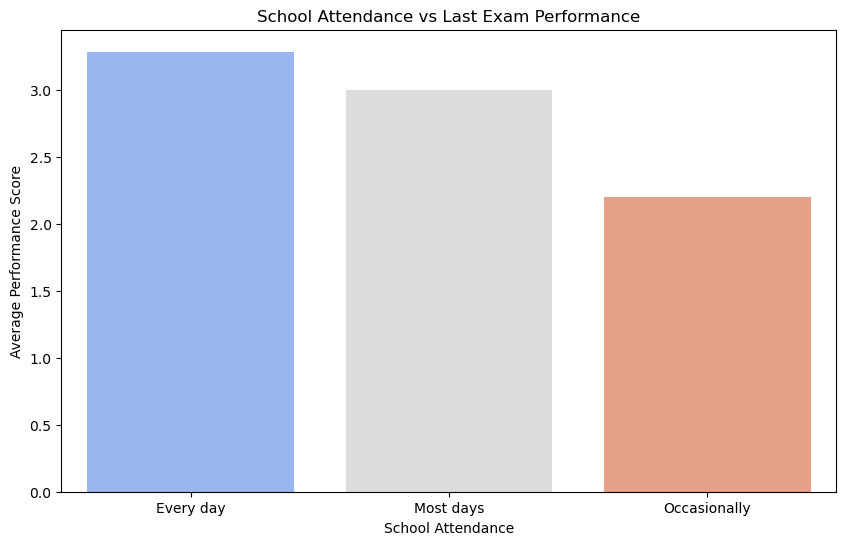

In [8]:
# Mapping performance categories to numerical values for analysis
performance_mapping = {
    'Below 40%': 1,
    '40% - 59%': 2,
    '60% - 69%': 3,
    '70% - 100%': 4
}

df['Last_Exam_Score'] = df['Last Exam Performance'].map(performance_mapping)

attendance_performance = df.groupby('School Attendance')['Last_Exam_Score'].mean().reset_index()

# Plotting the results
palette = sns.color_palette("coolwarm", 3)
plt.figure(figsize=(10, 6))
sns.barplot(x='School Attendance', y='Last_Exam_Score', data=attendance_performance, palette=palette,hue="School Attendance")
plt.title('School Attendance vs Last Exam Performance')
plt.ylabel('Average Performance Score')
plt.xlabel('School Attendance')

image_path = '../../../docs/1.png'  
plt.savefig(image_path)

plt.show()

In [13]:
attendance_performance

,School Attendance,Last_Exam_Score
0,Every day,3.288889
1,Most days,3.000000
2,Occasionally,2.200000


### Insights on School Attendance and Academic Performance
**Positive Impact of Daily Attendance:**

Students who attended school every day had the highest average exam performance score of 3.29. This suggests a strong positive correlation between consistent school attendance and higher academic achievement.
Moderate Performance with Less Frequent Attendance:

Students who attended school on most days had an average score of 3.00, indicating slightly lower performance compared to daily attendees. This implies that occasional absences may slightly reduce academic performance.
Significant Drop with Occasional Attendance:

Students who attended school occasionally had the lowest average score of 2.20, showing a notable drop in performance. This highlights that inconsistent attendance is linked to poorer academic outcomes.

`Conclusion:`
Regular school attendance appears to be crucial for better academic performance, with students attending every day outperforming those with less consistent attendance.

## Extracurricular Participation and Academic Performance

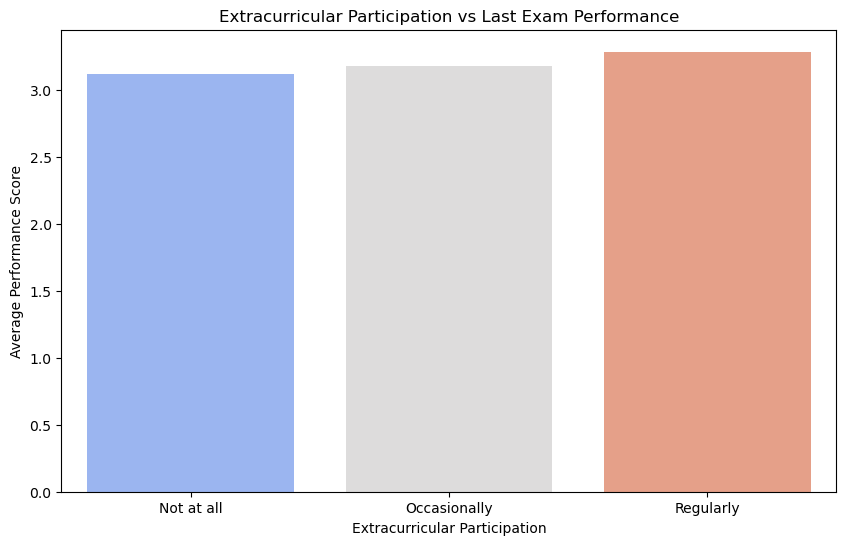

,Extracurricular Participation,Last_Exam_Score
0,Not at all,3.125000
1,Occasionally,3.179487
2,Regularly,3.288889


In [17]:
# Grouping the data by Extracurricular Participation and calculate the average performance score
extracurricular_performance = df.groupby('Extracurricular Participation')['Last_Exam_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Extracurricular Participation', y='Last_Exam_Score', data=extracurricular_performance, palette=palette,hue = "Extracurricular Participation")
plt.title('Extracurricular Participation vs Last Exam Performance')
plt.ylabel('Average Performance Score')
plt.xlabel('Extracurricular Participation')
image_path = '../../../docs/2.png'  
plt.savefig(image_path)
plt.show()

extracurricular_performance

### Insights on Extracurricular Participation and Academic Performance
**Highest Performance with Regular Participation:**

Students who participated in extracurricular activities regularly achieved the highest average exam score of 3.29. This suggests that consistent involvement in extracurricular activities may enhance academic performance, possibly due to better time management and balanced personal development.

**Moderate Performance with Occasional Participation:**

Students who participated occasionally had an average score of 3.18, which is slightly lower than regular participants but still indicates a positive correlation between involvement in extracurricular activities and academic success.

**Lowest Performance for Non-participants:**

Students with no participation in extracurricular activities had the lowest average score of 3.13. This suggests that not engaging in extracurriculars might slightly reduce academic performance compared to those who participate, even occasionally.

`Conclusion:`
Regular involvement in extracurricular activities seems to correlate with improved academic outcomes, indicating that students benefit from a balanced routine of academics and extracurricular pursuits.

## Extracurricular Hours and Academic Outcomes:

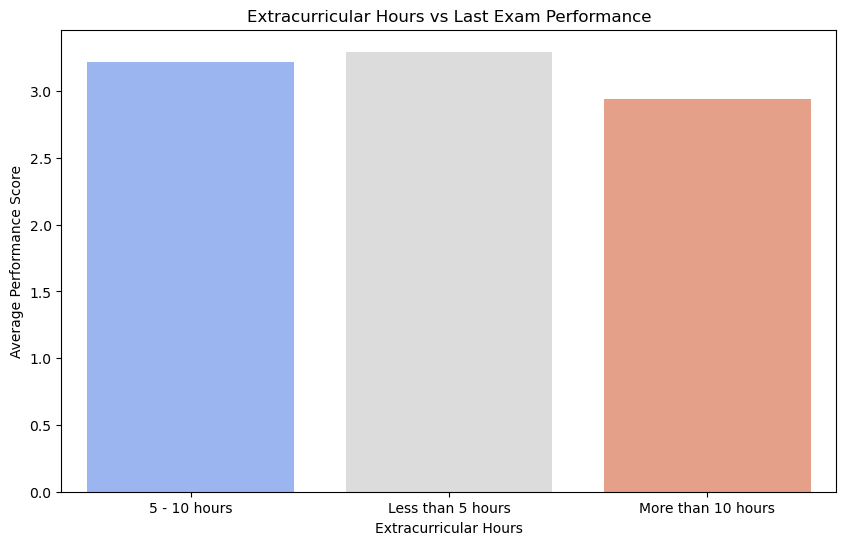

,Extracurricular Hours,Last_Exam_Score
0,5 - 10 hours,3.217391
1,Less than 5 hours,3.295082
2,More than 10 hours,2.937500


In [21]:
# Group the data by Extracurricular Hours and calculate the average performance score
extracurricular_hours_performance = df.groupby('Extracurricular Hours')['Last_Exam_Score'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Extracurricular Hours', y='Last_Exam_Score', data=extracurricular_hours_performance, palette=palette,hue = 'Extracurricular Hours')
plt.title('Extracurricular Hours vs Last Exam Performance')
plt.ylabel('Average Performance Score')
plt.xlabel('Extracurricular Hours')
image_path = '../../../docs/3.png'  
plt.savefig(image_path)
plt.show()

extracurricular_hours_performance

### Insights on Extracurricular Hours and Academic Performance
**Highest Performance with Less than 5 Hours:**

Students who spent less than 5 hours in extracurricular activities per week achieved the highest average exam score of 3.30. This suggests that limited involvement in extracurricular activities, allowing more focus on academics, may positively impact performance.

**Moderate Performance with 5 - 10 Hours:**

Students who spent 5 to 10 hours on extracurricular activities per week had a slightly lower average score of 3.22, indicating a balance between extracurriculars and academics can still support solid academic outcomes.

**Lowest Performance with More than 10 Hours:**

Students who participated in extracurricular activities for more than 10 hours per week had the lowest average score of 2.94. This may suggest that excessive involvement in non-academic activities could hinder academic performance, possibly due to time constraints or burnout.

`Conclusion:` While some level of extracurricular participation appears beneficial, too many hours devoted to extracurriculars might negatively affect academic performance. A balanced approach is key.

**Recommendation: Implement well-structured tutoring, moderate extracurricular involvement, and consistent school attendance to maximize student academic outcomes.**